In [3]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib.axis import Axis
import random
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.text as text
import matplotlib.collections as collections
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import yahoo_finance as yf
from datetime import date

In [4]:
sp= web.get_data_yahoo('^GSPC',"12-31-2010","11-29-2021")['Adj Close']

In [5]:
vix= web.get_data_yahoo('^VIX',"12-31-2010","11-29-2021")['Adj Close']

In [6]:
spchg=sp.pct_change()
vixchg=vix.pct_change()

In [7]:
pd.concat([spchg,vixchg],axis=1)

,Adj Close,Adj Close
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.011315,-0.007887
2011-01-04,-0.001313,-0.013061
2011-01-05,0.005007,-0.020713
2011-01-06,-0.002123,0.022327
...,...,...
2021-11-22,-0.003197,0.070352
2021-11-23,0.001657,0.010955
2021-11-24,0.002294,-0.041280


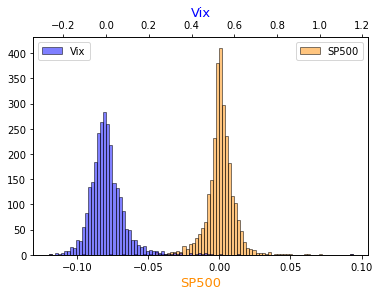

In [8]:
fig,ax = plt.subplots()
# make a plot
plt.grid(b=False)
ax.hist(spchg, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
# set y-axis label
ax.set_xlabel("SP500",color="darkorange",fontsize=13)
plt.legend(loc='upper right')
# twin object for two different y-axis on the sample plot
ax2=ax.twiny()
# make a plot with different y-axis using second axis object
ax2.hist(vixchg,color="blue",bins=100, label='Vix',alpha=0.5,edgecolor='black')
ax2.set_xlabel("Vix",color="blue",fontsize=13)
plt.legend(loc='upper left')
plt.show()

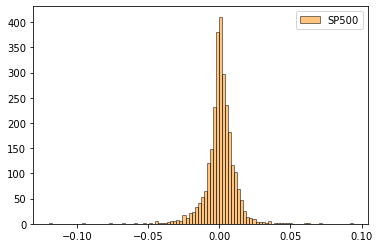

In [9]:
plt.hist(spchg, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
spchg
plt.legend()

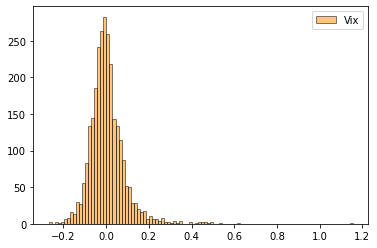

In [10]:
plt.hist(vixchg, color="darkorange",bins=100, label='Vix',alpha=0.5,edgecolor='black')
plt.legend()
plt.show()

In [11]:
d1=vixchg.describe()
d2=spchg.describe()
df=pd.concat([d1,d2],axis=1)
df

,Adj Close,Adj Close
count,2746.000000,2746.000000
mean,0.003402,0.000535
std,0.085211,0.010766
min,-0.269583,-0.119841
25%,-0.043890,-0.003340
50%,-0.006297,0.000703
75%,0.036469,0.005296
max,1.155979,0.093828


In [12]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [13]:
spnorm= (spchg-spchg.mean())/spchg.std()
vixnorm= (vixchg-vixchg.mean())/vixchg.std()

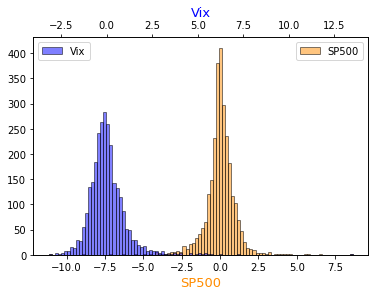

In [14]:
fig,ax = plt.subplots()
# make a plot
plt.grid(b=False)
ax.hist(spnorm, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
# set y-axis label
ax.set_xlabel("SP500",color="darkorange",fontsize=13)
plt.legend(loc='upper right')
# twin object for two different y-axis on the sample plot
ax2=ax.twiny()
# make a plot with different y-axis using second axis object
ax2.hist(vixnorm,color="blue",bins=100, label='Vix',alpha=0.5,edgecolor='black')
ax2.set_xlabel("Vix",color="blue",fontsize=13)
plt.legend(loc='upper left')
plt.grid(False)

In [15]:
ax.xaxis.set_major_formatter('σ{x:0.1f}')
ax2.xaxis.set_major_formatter('σ{x:0.1f}')
plt.show()

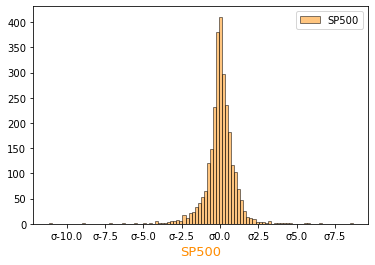

In [16]:
fig,ax3 = plt.subplots()
# make a plot
plt.grid(b=False)
ax3.hist(spnorm, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
# set y-axis label
ax3.set_xlabel("SP500",color="darkorange",fontsize=13)
plt.legend(loc='upper right')
ax3.xaxis.set_major_formatter('σ{x:0.1f}')
plt.show()

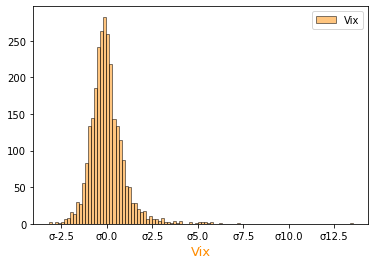

In [17]:
fig,ax4 = plt.subplots()
# make a plot
plt.grid(b=False)
ax4.hist(vixnorm, color="darkorange",bins=100, label='Vix',alpha=0.5,edgecolor='black')
# set y-axis label
ax4.set_xlabel("Vix",color="darkorange",fontsize=13)
plt.legend(loc='upper right')
ax4.xaxis.set_major_formatter('σ{x:0.1f}')
plt.show()

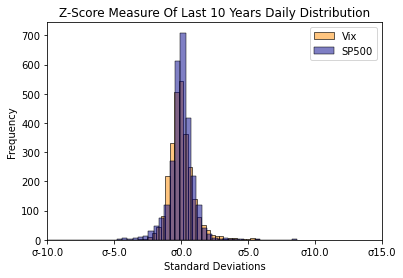

In [18]:
fig,ax = plt.subplots()
sns.histplot(vixnorm, color="darkorange",bins=50, label='Vix',alpha=0.5,edgecolor='black')
sns.histplot(spnorm, color="darkblue",bins=50, label='SP500',alpha=0.5,edgecolor='black')
ax.xaxis.set_major_formatter('σ{x:0.1f}')
plt.xlim(-10,15)
plt.title('Z-Score Measure Of Last 10 Years Daily Distribution')
plt.xlabel('Standard Deviations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

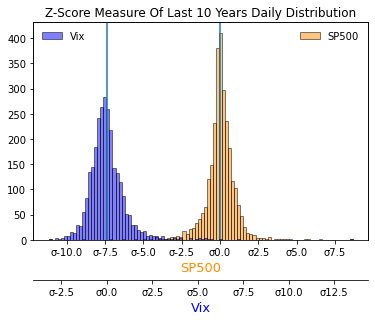

In [19]:
fig,ax = plt.subplots()
# make a plot
plt.grid(b=False)
ax.hist(spnorm, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
# set y-axis label
ax.set_xlabel("SP500",color="darkorange",fontsize=13)
ax.xaxis.set_major_formatter('σ{x:0.1f}')
plt.legend(loc='upper right',frameon=False)

# twin object for two different y-axis on the sample plot

ax2= ax.twiny()

ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))


# make a plot with different y-axis using second axis object
ax2.hist(vixnorm,color="blue",bins=100, label='Vix',alpha=0.5,edgecolor='black')
ax2.set_xlabel("Vix",color="blue",fontsize=13)
ax2.xaxis.set_major_formatter('σ{x:0.1f}')

plt.grid(False)
ax.axvline(vixchg.mean())
ax2.axvline(spchg.mean())

skew_v=vixnorm.skew()
spnorm.skew()
vixnorm.kurtosis()
spnorm.kurtosis()

plt.legend(loc='upper left',frameon=False)

plt.title('Z-Score Measure Of Last 10 Years Daily Distribution')
plt.xlabel('Vix')
plt.ylabel('Frequency')
plt.show()

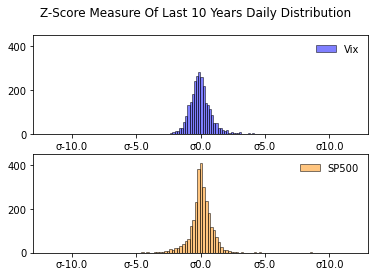

In [20]:
fig, axs = plt.subplots(2)
fig.suptitle('Z-Score Measure Of Last 10 Years Daily Distribution')

axs[0].hist(vixnorm,color="blue",bins=100, label='Vix',alpha=0.5,edgecolor='black')
axs[0].set_xlim([-13,13])
axs[0].set_ylim([0,450])
axs[1].hist(spnorm, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')
axs[1].set_xlim([-13,13])
axs[1].set_ylim([0,450])

axs[0].legend(loc='upper right',frameon=False)
axs[0].xaxis.set_major_formatter('σ{x:0.1f}')
axs[1].legend(loc='upper right',frameon=False)
axs[1].xaxis.set_major_formatter('σ{x:0.1f}')


plt.show()

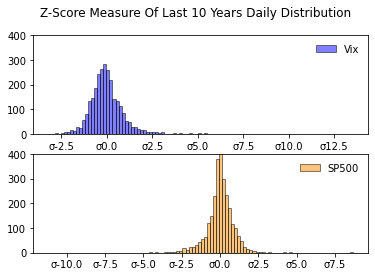

In [21]:
fig, axs = plt.subplots(2)
fig.suptitle('Z-Score Measure Of Last 10 Years Daily Distribution')

axs[0].hist(vixnorm,color="blue",bins=100, label='Vix',alpha=0.5,edgecolor='black')
axs[1].hist(spnorm, color="darkorange",bins=100, label='SP500',alpha=0.5,edgecolor='black')

axs[0].legend(loc='upper right',frameon=False)
axs[0].xaxis.set_major_formatter('σ{x:0.1f}')
axs[0].set_ylim([0,400])
axs[1].legend(loc='upper right',frameon=False)
axs[1].xaxis.set_major_formatter('σ{x:0.1f}')
axs[1].set_ylim([0,400])


plt.show()

In [22]:
vskew=vixnorm.skew()
vkurt=vixnorm.kurtosis()
vmed=vixnorm.median()
vmean=vixnorm.mean()

In [23]:
spskew=spnorm.skew()
spkurt=spnorm.kurtosis()
spmed=spnorm.median()
spmean=spnorm.mean()

In [24]:
pd.DataFrame({'SP500': [spskew,spkurt,spmean,spmed], 'Vix': [vskew,vkurt,vmean,vmed]},['skew','kurtosis','mean','median'])


,SP500,Vix
skew,-6.310569e-01,2.325600e+00
kurtosis,1.668289e+01,1.786988e+01
mean,-1.237175e-17,1.298629e-16
median,1.556753e-02,-1.138200e-01
